In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
from numpy.linalg import norm 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.preprocessing import normalize
from numpy.random import randn, rand, permutation

import helperFunctions as hf

In [3]:
# Size for dictionary blocks
block = 12

# # %% Load data and reshape
downScale = 6
cat = imread('Images/cat.JPG', as_gray=True)
cat = block_reduce(cat, block_size=(downScale, downScale))
H, W = cat.shape
H = block * (H // block) 
W = block * (W // block)
cat = cat[:H, :W]

flo = imread('Images/flower.JPG', as_gray=True)
flo = block_reduce(flo, block_size=(downScale, downScale))[:H,:W]

downScale = 10
duck = imread('Images/duck.JPG', as_gray=True)
duck = block_reduce(duck, block_size=(downScale, downScale))[:H,:W]

print('Blocks/image: ',int((H/block)*(W/block)))

Blocks/image:  532


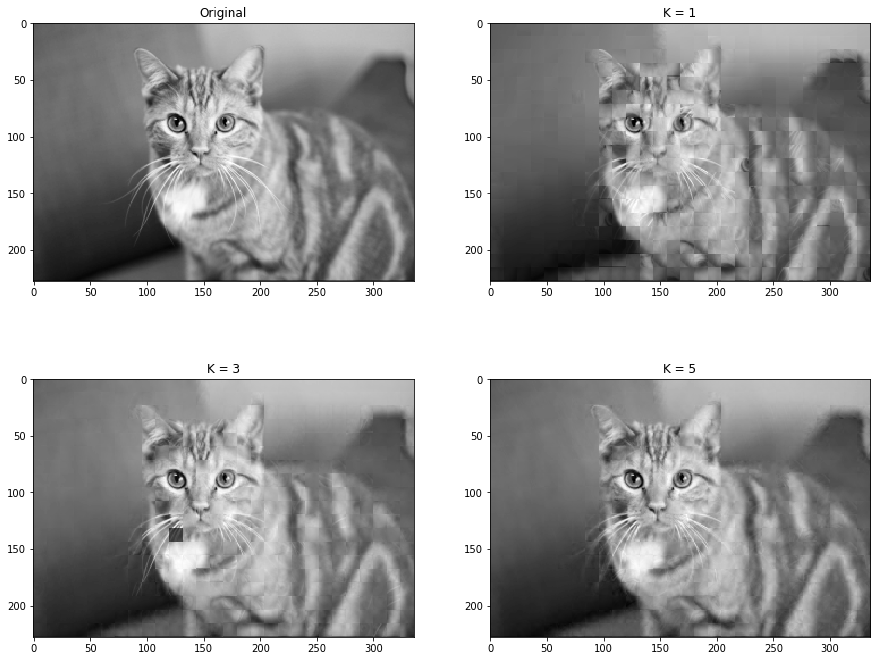

In [5]:
# Alter target sparsity level (number of atoms combined for each signal)
Ks = [1, 3, 5]
numAtoms = 100

fig, axes = plt.subplots(2, 2, figsize=(15,12))
plt.set_cmap('gray')
axes[0][0].imshow(cat)
axes[0][0].set_title('Original')

# Partition into pixel blocks
cat_block = hf.ImgBlockPartition(cat,block,block)
M, N, P   = cat_block.shape
cat_block = np.reshape(cat_block,(M,N*P))

for ii, K in enumerate(Ks):
    D, Xh = hf.kSVD(cat_block,numAtoms,K)
    cat_recovered   = D @ Xh
    cat_reconstruct = hf.ImgBlockReconstruct(cat_recovered,block,block,H,W)

    jj = ii+1
    axes[jj//2][jj%2].imshow(cat_reconstruct)
    axes[jj//2][jj%2].set_title("K = %d"%K);

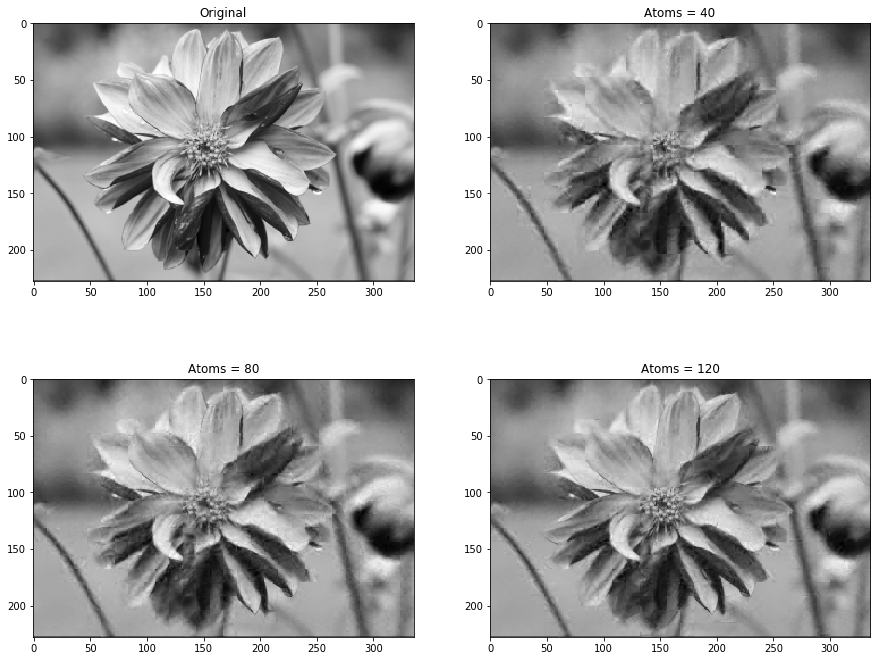

In [8]:
# Test reconstruction of various dictionary sizes
K = 5
atoms = [40, 80, 120]

fig, axes = plt.subplots(2, 2, figsize=(15,12))
plt.set_cmap('gray')
axes[0][0].imshow(flo)
axes[0][0].set_title('Original')

# Partition into pixel blocks
flo_block = hf.ImgBlockPartition(flo,block,block)
M, N, P   = flo_block.shape
flo_block = np.reshape(flo_block,(M,N*P))

for ii, numAtoms in enumerate(atoms):
    D, Xh = hf.kSVD(flo_block,numAtoms,K)
    flo_recovered   = D @ Xh
    flo_reconstruct = hf.ImgBlockReconstruct(flo_recovered,block,block,H,W)
    
    jj = ii+1
    axes[jj//2][jj%2].imshow(flo_reconstruct)
    axes[jj//2][jj%2].set_title("Atoms = %d"%numAtoms);

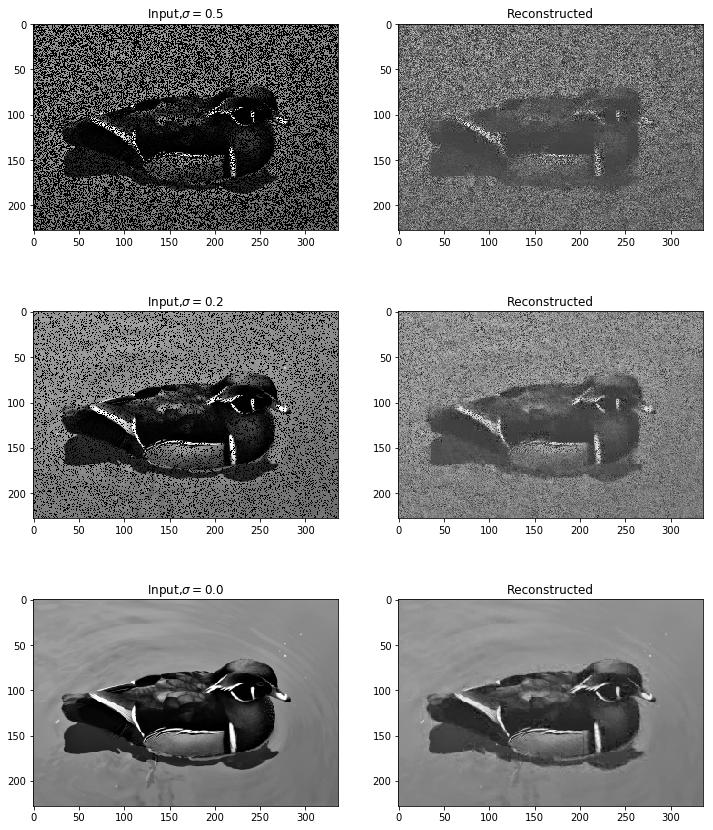

In [9]:
# Test reconstruction at various noise levels - remove pixels
K = 5
numAtoms = 100
sigmas = [0.5, 0.2, 0.00]

fig, axes = plt.subplots(3, 2, figsize=(12,15))
plt.set_cmap('gray')

for ii, sigma in enumerate(sigmas):
    mask = np.random.rand(H, W)
    duck_noise = duck * (mask > sigma)
    
    # Partition into pixel blocks
    duck_block = hf.ImgBlockPartition(duck_noise,block,block)
    M, N, P   = duck_block.shape
    duck_block = np.reshape(duck_block,(M,N*P))
    
    D, Xh = hf.kSVD(duck_block,numAtoms,K)
    duck_recovered   = D @ Xh
    duck_reconstruct = hf.ImgBlockReconstruct(duck_recovered,block,block,H,W)
    
    axes[ii][0].imshow(duck_noise)
    axes[ii][0].set_title("Input,$\sigma = ${}".format(sigma))
    
    duck_recovered = D @ Xh
    axes[ii][1].imshow(duck_reconstruct)
    axes[ii][1].set_title("Reconstructed")